<a href="https://colab.research.google.com/github/Ansalnakhan/TSA/blob/main/DL_ASSG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! unzip /content/dl_dataset.zip

Archive:  /content/dl_dataset.zip
  inflating: dl_dataset/img_1.jpg    
  inflating: dl_dataset/img_10.jpg   
  inflating: dl_dataset/img_11.jpg   
  inflating: dl_dataset/img_12.jpg   
  inflating: dl_dataset/img_13.jpg   
  inflating: dl_dataset/img_14.jpg   
  inflating: dl_dataset/img_15.jpg   
  inflating: dl_dataset/img_16.jpg   
  inflating: dl_dataset/img_17.jpg   
  inflating: dl_dataset/img_18.jpg   
  inflating: dl_dataset/img_19.jpg   
  inflating: dl_dataset/img_2.jpg    
  inflating: dl_dataset/img_20.jpg   
  inflating: dl_dataset/img_3.jpg    
  inflating: dl_dataset/img_4.jpg    
  inflating: dl_dataset/img_5.jpg    
  inflating: dl_dataset/img_6.jpg    
  inflating: dl_dataset/img_7.jpg    
  inflating: dl_dataset/img_8.jpg    
  inflating: dl_dataset/img_9.jpg    


In [ ]:
! unzip /content/ansalna.zip

Archive:  /content/ansalna.zip
  inflating: ansalna/IMG-20220718-WA0000.jpg  
  inflating: ansalna/IMG-20220718-WA0001.jpg  
  inflating: ansalna/IMG-20220718-WA0002.jpg  
  inflating: ansalna/IMG-20220718-WA0003.jpg  
  inflating: ansalna/IMG-20220718-WA0004.jpg  
  inflating: ansalna/IMG-20220718-WA0005.jpg  
  inflating: ansalna/IMG-20220718-WA0006.jpg  
  inflating: ansalna/IMG-20220718-WA0007.jpg  
  inflating: ansalna/IMG-20220718-WA0008.jpg  
  inflating: ansalna/IMG-20220718-WA0009.jpg  
  inflating: ansalna/IMG-20220718-WA0010.jpg  
  inflating: ansalna/IMG-20220718-WA0011.jpg  
  inflating: ansalna/IMG-20220718-WA0012.jpg  
  inflating: ansalna/IMG-20220718-WA0013.jpg  
  inflating: ansalna/IMG-20220718-WA0014.jpg  
  inflating: ansalna/IMG-20220718-WA0015.jpg  
  inflating: ansalna/IMG-20220718-WA0016.jpg  
  inflating: ansalna/IMG-20220718-WA0017.jpg  
  inflating: ansalna/IMG-20220718-WA0018.jpg  
  inflating: ansalna/IMG-20220718-WA0019.jpg  
  inflating: ansalna/IMG-2022

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import Augmentor
p = Augmentor.Pipeline("/content/dl_dataset")
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 20 image(s) found.
Output directory set to /content/dl_dataset/output.

Processing <PIL.Image.Image image mode=RGB size=468x960 at 0x7FBD90B72790>: 100%|██████████| 100/100 [00:13<00:00,  7.44 Samples/s]


In [ ]:
p = Augmentor.Pipeline("/content/ansalna")
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 23 image(s) found.
Output directory set to /content/ansalna/output.

Processing <PIL.Image.Image image mode=RGB size=719x1280 at 0x7FBD95528350>: 100%|██████████| 100/100 [00:08<00:00, 11.55 Samples/s]


In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
train_dir="/content/Train"
valid_dir="/content/Test"

In [ ]:
!rmdir /content/Train/.ipynb_checkpoints

In [ ]:
!rmdir /content/Test/.ipynb_checkpoints

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=10,
    class_mode="binary",
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode="binary",
    seed=42
)

Found 200 images belonging to 2 classes.
Found 43 images belonging to 2 classes.


In [ ]:
model_1=tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu",
                        input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")                                                                               
                                    
])

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=["accuracy"])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)

In [ ]:
history=model_1.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks=[callback]
                    )

Epoch 1/100
20/20 [==============================] - 16s 205ms/step - loss: 0.6712 - accuracy: 0.4850 - val_loss: 0.6227 - val_accuracy: 0.5581
Epoch 2/100
20/20 [==============================] - 4s 184ms/step - loss: 0.5900 - accuracy: 0.6800 - val_loss: 0.5272 - val_accuracy: 0.7209
Epoch 3/100
20/20 [==============================] - 4s 186ms/step - loss: 0.4723 - accuracy: 0.8650 - val_loss: 0.4066 - val_accuracy: 0.9767
Epoch 4/100
20/20 [==============================] - 4s 188ms/step - loss: 0.3596 - accuracy: 0.9200 - val_loss: 0.2877 - val_accuracy: 0.9070
Epoch 5/100
20/20 [==============================] - 4s 182ms/step - loss: 0.2623 - accuracy: 0.9300 - val_loss: 0.2000 - val_accuracy: 0.9535
Epoch 6/100
20/20 [==============================] - 5s 227ms/step - loss: 0.2094 - accuracy: 0.9300 - val_loss: 0.1501 - val_accuracy: 0.9535


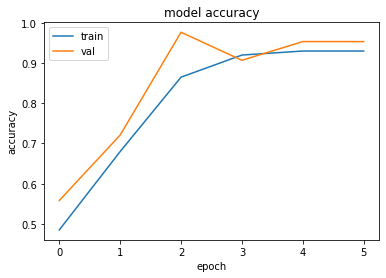

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

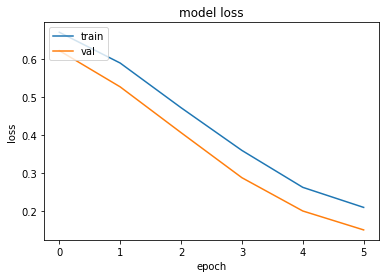

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import numpy as np

In [ ]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))

  plt.imshow(img1)

  Y=image.img_to_array(img1)

  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  print(val)
  if val <=0.5:
    plt.xlabel("Ansalna",fontsize=30)
  elif val >=0.5:
    plt.xlabel("Archa",fontsize=30)  


[[1.]]


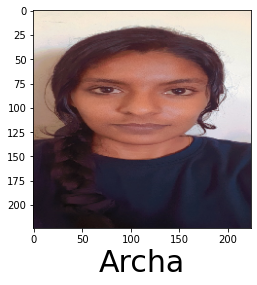

In [ ]:
predictImage("/content/WhatsApp Image 2022-07-17 at 12.25.14 PM.jpeg")

[[1.4961217e-18]]


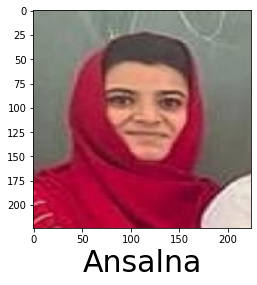

In [ ]:
predictImage("/content/WhatsApp Image 2022-07-18 at 4.51.06 PM.jpeg")

In [ ]:
! zip -r /content/train.zip /content/Train

  adding: content/Train/ (stored 0%)
  adding: content/Train/ansalna/ (stored 0%)
  adding: content/Train/ansalna/ansalna_original_IMG-20220718-WA0002.jpg_69f7f364-fc8f-4162-909d-4c96c499ea37.jpg (deflated 4%)
  adding: content/Train/ansalna/ansalna_original_IMG-20220718-WA0018.jpg_c6184e70-a645-4020-b73b-b422d6af82fa.jpg (deflated 1%)
  adding: content/Train/ansalna/ansalna_original_IMG-20220718-WA0001.jpg_ffab17f4-9f9a-4214-86ef-cd91e779cb36.jpg (deflated 18%)
  adding: content/Train/ansalna/ansalna_original_IMG-20220718-WA0004.jpg_39e60baa-a2da-4cfc-90d1-c80d13c8825d.jpg (deflated 3%)
  adding: content/Train/ansalna/ansalna_original_IMG-20220718-WA0004.jpg_aa9009f6-c984-45fc-adb4-95166d633a7a.jpg (deflated 4%)
  adding: content/Train/ansalna/ansalna_original_IMG-20220718-WA0022.jpg_18d71266-093d-4d7f-bfb5-5e37f4320cbc.jpg (deflated 0%)
  adding: content/Train/ansalna/ansalna_original_IMG-20220718-WA0011.jpg_f0609b1c-a174-42f5-a270-c63a908b3864.jpg (deflated 2%)
  adding: content/Tra

In [ ]:
! zip -r /content/test.zip /content/Test

  adding: content/Test/ (stored 0%)
  adding: content/Test/ansalna/ (stored 0%)
  adding: content/Test/ansalna/IMG-20220718-WA0015.jpg (deflated 0%)
  adding: content/Test/ansalna/IMG-20220718-WA0016.jpg (deflated 0%)
  adding: content/Test/ansalna/IMG-20220718-WA0020.jpg (deflated 1%)
  adding: content/Test/ansalna/IMG-20220718-WA0011.jpg (deflated 1%)
  adding: content/Test/ansalna/IMG-20220718-WA0019.jpg (deflated 1%)
  adding: content/Test/ansalna/IMG-20220718-WA0010.jpg (deflated 1%)
  adding: content/Test/ansalna/IMG-20220718-WA0009.jpg (deflated 1%)
  adding: content/Test/ansalna/IMG-20220718-WA0021.jpg (deflated 0%)
  adding: content/Test/ansalna/IMG-20220718-WA0005.jpg (deflated 1%)
  adding: content/Test/ansalna/IMG-20220718-WA0007.jpg (deflated 0%)
  adding: content/Test/ansalna/IMG-20220718-WA0002.jpg (deflated 1%)
  adding: content/Test/ansalna/IMG-20220718-WA0000.jpg (deflated 1%)
  adding: content/Test/ansalna/IMG-20220718-WA0014.jpg (deflated 2%)
  adding: content/Test/